# Happiness Score of Countries Aanlysis (2022 data)


## Introduction

This analyses the World Happiness Report 2022. 
We analyse global happiness scores and the contributing factors like GDP per capita, social support, health, etc., and visualize insights .



### Libraries required

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [5]:
# reading data

try:
    df = pd.read_csv("Happiness Report 2022.csv")
    print("File Loaded successfully")
except FileNotFoundError:
    print("'Happiness Report 2022.csv' File not found")
except Exception as e:
    print("Unexpected error occured")




File Loaded successfully


### Data cleaning

In [6]:
# Finding total missing values in each column

def check_missing():
    missing_count = df.isnull().sum()
    display(missing_count)
 

    missing_cols = missing_count[missing_count > 0]
    print("columns thats have missing values", missing_cols)

    if len(missing_cols) == 0:
        print("No missing vlaues")
        return 0
    return len(missing_cols)


check_missing()
# only continent column had 8 missing values:
# assign them 'Unknown' string value

df.fillna('Unknown', inplace=True)
df
# rechecking missing columns
if check_missing() == 0:
    print("Procceed")
else:
    print("Proceeding with some NaN values")

RANK                            0
Country                         0
Happiness score                 0
Whisker-high                    0
Whisker-low                     0
Dystopia (1.83) + residual      0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
continent                       8
dtype: int64

columns thats have missing values continent    8
dtype: int64


RANK                            0
Country                         0
Happiness score                 0
Whisker-high                    0
Whisker-low                     0
Dystopia (1.83) + residual      0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
continent                       0
dtype: int64

columns thats have missing values Series([], dtype: int64)
No missing vlaues
Procceed


### Basic information

In [7]:
# basic info of data

print(f"INFO\n")
df.info()

print("DESCRIBE:")
print(df.describe())


print(f"HEAD\n{df.head()}")

print(f"total null values per column = {df.isnull().sum()}")


INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RANK                          146 non-null    int64  
 1   Country                       146 non-null    object 
 2   Happiness score               146 non-null    float64
 3   Whisker-high                  146 non-null    float64
 4   Whisker-low                   146 non-null    float64
 5   Dystopia (1.83) + residual    146 non-null    float64
 6   GDP per capita                146 non-null    float64
 7   Social support                146 non-null    float64
 8   Healthy life expectancy       146 non-null    float64
 9   Freedom to make life choices  146 non-null    float64
 10  Generosity                    146 non-null    float64
 11  Perceptions of corruption     146 non-null    float64
 12  continent                     146 non-null    object 
dtyp

### Helping variables for large column names and numeric column names

In [8]:
# helping variables for large column names

print("Old column names = ",df.columns)

score = "Happiness score"
gdp_col = "GDP per capita"
social_support = "Social support"
freedom_col = "Freedom to make life choices"
rank_col = "RANK"
country_col = "Country"
whigh = "Whisker-high"
wlow = "Whisker-low"
dystopia = "Dystopia (1.83) + residual"
health = "Healthy life expectancy"
generosity = "Generosity"
corruption = "Perceptions of corruption"

print("New column names = ")
print(score, gdp_col, social_support, freedom_col, rank_col, country_col,
      whigh, wlow, dystopia, health, generosity, corruption)


numeric_cols = [score, whigh, wlow, dystopia, gdp_col, social_support, health, freedom_col, generosity, corruption]
print("Numeric columns = ",numeric_cols)


Old column names =  Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'continent'],
      dtype='object')
New column names = 
Happiness score GDP per capita Social support Freedom to make life choices RANK Country Whisker-high Whisker-low Dystopia (1.83) + residual Healthy life expectancy Generosity Perceptions of corruption
Numeric columns =  ['Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


### Analysis begins

In [9]:
# Analysis
# Top 10 and bottom 10 nations in happiness score
top10 = df.head(10)
bottom10 = df.tail(10)
print("Top 10 happiest nations:")
display(top10)
print("Bottom 10 nations:")
display(bottom10)


Top 10 happiest nations:


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419,Europe
5,6,Luxembourg,7.404,7.501,7.307,2.042,2.209,1.155,0.790,0.700,0.120,0.388,Europe
6,7,Sweden,7.384,7.454,7.315,2.003,1.920,1.204,0.803,0.724,0.218,0.512,Europe
7,8,Norway,7.365,7.440,7.290,1.925,1.997,1.239,0.786,0.728,0.217,0.474,Europe
8,9,Israel,7.364,7.426,7.301,2.634,1.826,1.221,0.818,0.568,0.155,0.143,Asia
9,10,New Zealand,7.200,7.279,7.120,1.954,1.852,1.235,0.752,0.680,0.245,0.483,Oceania


Bottom 10 nations:


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,continent
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083,Africa
137,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,0.140,0.157,Africa
138,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,0.248,0.270,Africa
139,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,0.202,0.055,Africa
140,141,Lesotho,3.512,3.748,3.276,1.312,0.839,0.848,0.000,0.419,0.076,0.018,Africa
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102,Africa
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544,Africa
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105,Africa
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034,Asia
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005,Asia


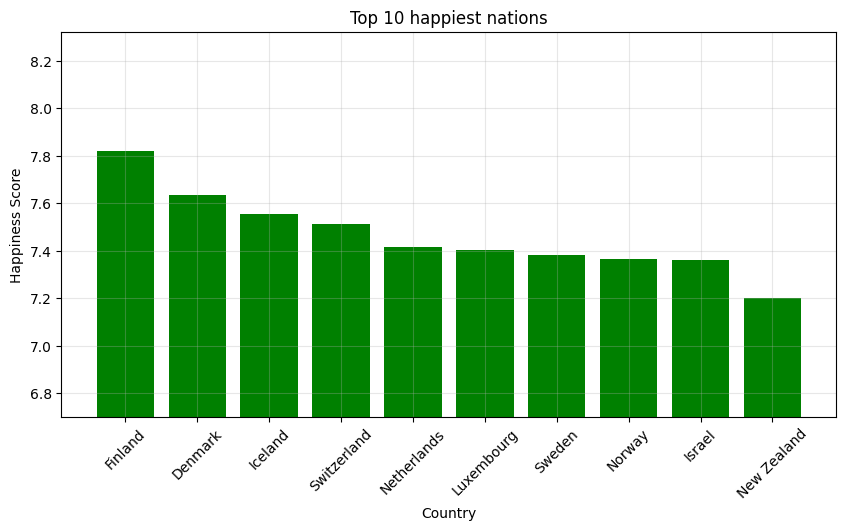

In [10]:
#  bar plot of top 10 happierst nation using matplotlib


plt.figure(figsize=(10,5))
plt.title("Top 10 happiest nations")
plt.bar(top10['Country'], top10[score], color="green")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.ylim(top10[score].min() -0.5 , top10[score].max() +0.5)
plt.grid(alpha=0.3)
plt.show()



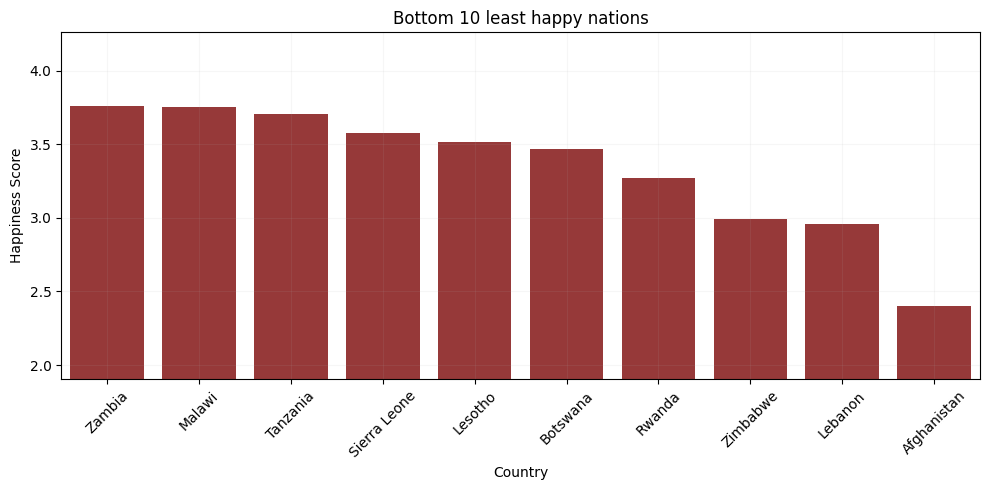

In [11]:
#  bar plot of bottom 10 happierst nation using seaborn


plt.figure(figsize=(10,5))
plt.title("Bottom 10 least happy nations")

barplot = sns.barplot(x='Country', y=score, data=bottom10, color='brown')

plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)


plt.ylim(bottom10[score].min() -0.5 , bottom10[score].max() +0.5)

plt.grid(alpha=0.1)
plt.tight_layout()

plt.show()

Correlation matrix


,GDP per capita,Social support,Freedom to make life choices,Happiness score
GDP per capita,1.000,0.722,0.459,0.764
Social support,0.722,1.000,0.480,0.778
Freedom to make life choices,0.459,0.480,1.000,0.625
Happiness score,0.764,0.778,0.625,1.000


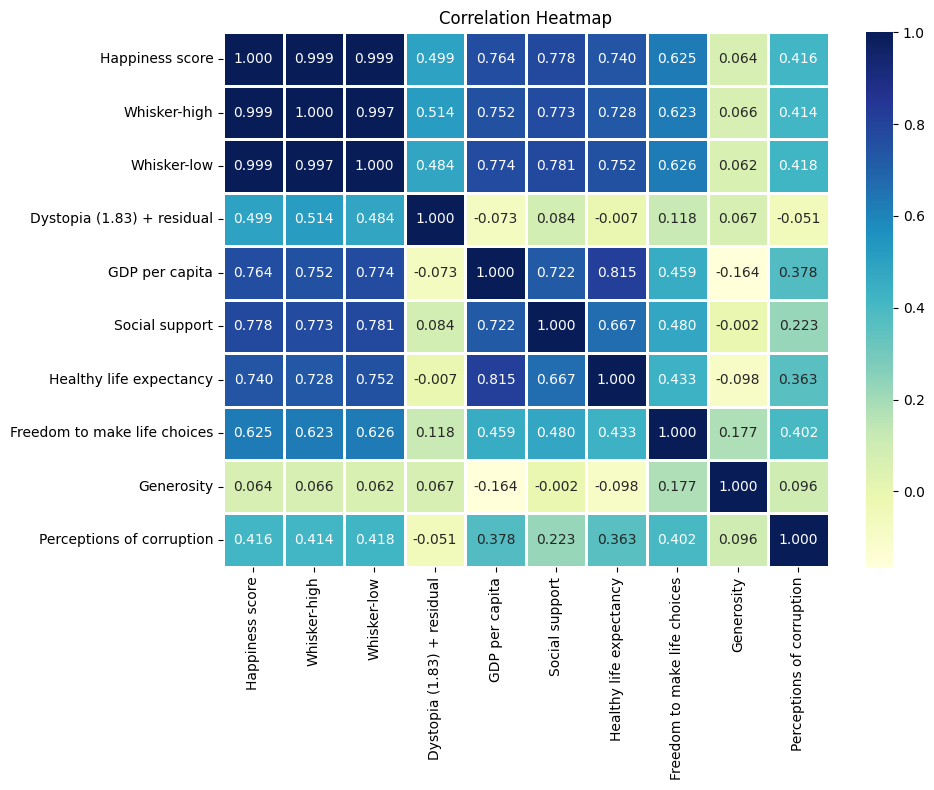

In [12]:
# correlation of gdp, social support, freedom, happiness score

print("Correlation matrix")
display(df[[gdp_col, social_support, freedom_col, score ]].corr().round(3))

# correlation heatmap
numeric_df = df[numeric_cols] # creating dataframe of numeric columns
numeric_df_cor = numeric_df.corr() # corelation of it

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df_cor, annot=True, fmt='.3f',  cmap='YlGnBu', linewidths=1)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

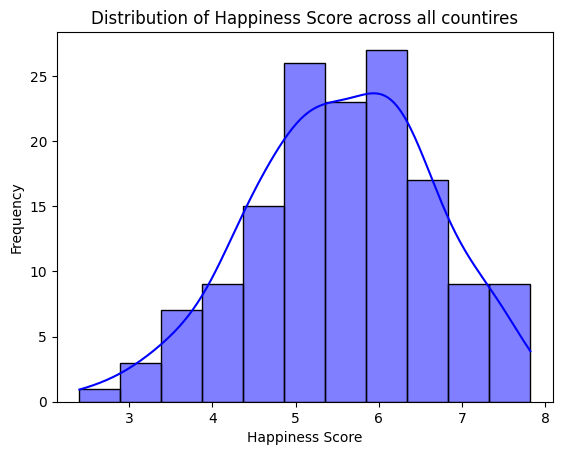

In [13]:
# histogram using seaborn

sns.histplot(df[score], kde=True, bins='auto', color='blue')
plt.title('Distribution of Happiness Score across all countires')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


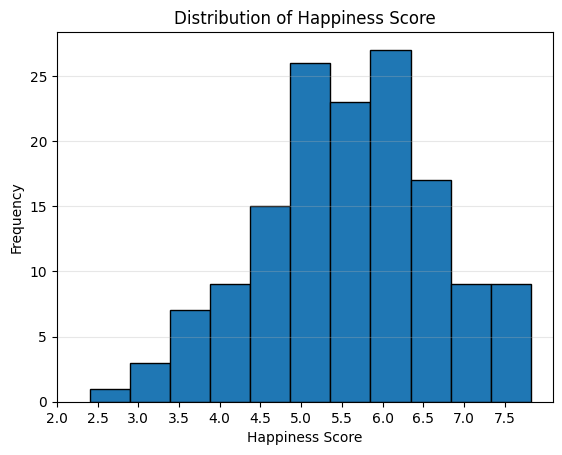

In [14]:
# histogram using matplotlib


plt.hist(df[score], bins='auto', edgecolor='black')
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.xticks(np.arange(2,8, 0.5))
plt.show()

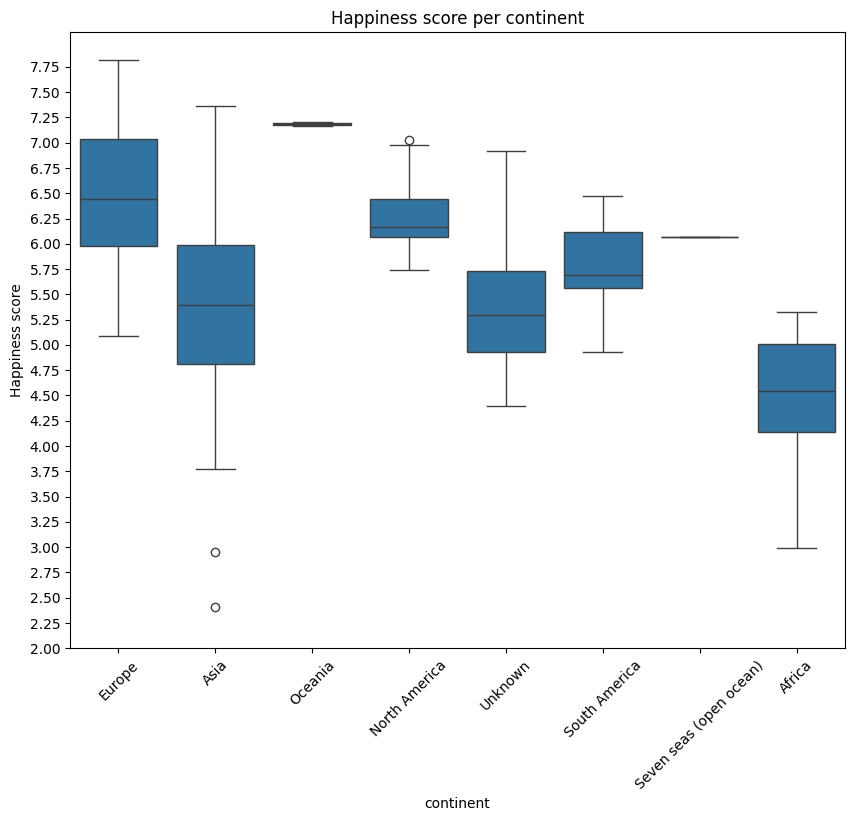

In [15]:
# boxplot of all continents using seaborn

plt.figure(figsize=(10,8))
sns.boxplot(x='continent', y=score, data=df)
plt.yticks(np.arange(2,8, 0.25))
plt.xticks(rotation=45)
plt.title("Happiness score per continent")
plt.show()

In [16]:
# top 10, bottom 10 mean socre calculation

top10_mean = top10[numeric_cols].mean().to_frame(name='mean_values')
top10_mean['Group'] = 'top'
display(top10_mean)
bottom10_mean = bottom10[numeric_cols].mean().to_frame(name='mean_values')
bottom10_mean['Group'] = 'bottom'
display(bottom10_mean)


,mean_values,Group
Happiness score,7.4658,top
Whisker-high,7.5404,top
Whisker-low,7.3912,top
Dystopia (1.83) + residual,2.1912,top
GDP per capita,1.9556,top
Social support,1.2307,top
Healthy life expectancy,0.7913,top
Freedom to make life choices,0.6901,top
Generosity,0.1940,top
Perceptions of corruption,0.4137,top


,mean_values,Group
Happiness score,3.3391,bottom
Whisker-high,3.4927,bottom
Whisker-low,3.1858,bottom
Dystopia (1.83) + residual,0.9149,bottom
GDP per capita,0.9336,bottom
Social support,0.4853,bottom
Healthy life expectancy,0.3324,bottom
Freedom to make life choices,0.4010,bottom
Generosity,0.1345,bottom
Perceptions of corruption,0.1373,bottom


In [17]:
# Concating the two data frames
merged_means = pd.concat([top10_mean, bottom10_mean], axis=0)
merged_means.head()

,mean_values,Group
Happiness score,7.4658,top
Whisker-high,7.5404,top
Whisker-low,7.3912,top
Dystopia (1.83) + residual,2.1912,top
GDP per capita,1.9556,top


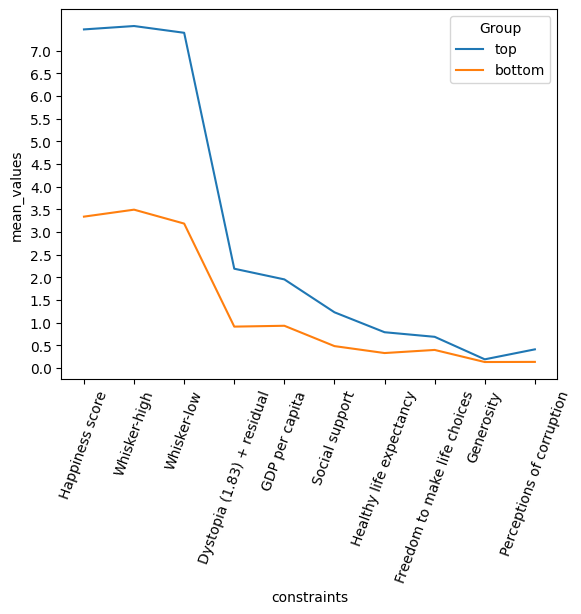

In [18]:
sns.lineplot(data=merged_means, x=merged_means.index, y='mean_values', hue='Group')
plt.xticks(rotation=70)
plt.yticks(np.arange(0,7.5,0.5))
plt.xlabel("constraints")


plt.show()

## Findings

- Majority of world's countires fall into mid-range of hapiness (4.5 t0 6.5)  
- Oceania, Europe, North America are happiest  
- Africa has lowest happiness score
- Asia has wide spread, has some outliers
- The average happiness socre and all contributing factors means are lower in the bottom 10 nation compared to the top 10 nations.

- suprisingly genorisity is not a mazor factor for happiness
- The happiness socres distribution across all countires are approximately bell-shaped, but not perfect.
    - It has single peak, tail appears on both side, distribution is nearly symmetric around mean
    - There are slightly more values in lef, slight negative skew, the peak is a bit flatter 

    